# This is my final project for Soc Med Anal/Web Min(17090).I will demonstrate how to do sentiment analysis using Twitter data using the Scikit-Learn library.

# Business and data understanding

***Business question*** As more countries declare a nationwide shutdown, most of the people are asked to stay at home and quarantined. 
I wanted to know what people are feeling during this “closedown ” period.            
***For the dataset and techniques*** I extracted 13,757 tweets with “#coronavirus”,“#reopening”,“#trump” amd “#governors” hashtags from Twitter using the Twitter Streaming API.                                                                                                      


# An exploratory and sentimental analysis of what people feel about the Coronavirus lockdown

## Problem Definition
I extracted 13,757 tweets from Twitter using the Twitter Streaming API. The task is to predict whether a tweet contains positive, negative, or neutral sentiment about coronavirus. This is a typical supervised learning task where given a text string.
 

## Solution
To solve this problem, I will follow the typical machine learning pipeline. I will first import the required libraries and the dataset. I will then do exploratory data analysis to see if I can find any trends in the dataset. Next, I will perform text preprocessing to convert textual data to numeric data that can be used by a machine learning algorithm. Finally,I will use machine learning algorithms to train and test my sentiment analysis models.

# Data identification and collection

#### Twitter Streaming API to collect tweets 

#####  Import libraries

In [163]:
# -*- coding: utf-8 -*-
# import popular packages
import csv
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup   # python package to handle HTML 
import re
import numpy as np
import nltk
from nltk.corpus import stopwords

# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import json
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
from collections import Counter
from operator import itemgetter
# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

# gensim for topic modeling
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
import pyLDAvis.sklearn

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import csv
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# show images
from IPython.display import Image
from IPython.core.display import HTML 

# suppress error messages
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

pd.set_option('display.max_colwidth', -1)

In [56]:
# load json file frorm Twitter Streaming API.
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('../final_project/twitterdata.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print(len(data))

13757


In [58]:
# read the first tweets and other meta data only
for i in data[:1]:
    print(i)

{'created_at': 'Sun May 03 18:04:47 +0000 2020', 'id': 1257008215943835648, 'id_str': '1257008215943835648', 'text': 'CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1116029242708508674, 'id_str': '1116029242708508674', 'name': 'CIBERCLOPEDIA WEX 2144', 'screen_name': 'germancuriel5', 'location': 'Jalisco, México', 'url': None, 'description': "DISFRUTAR UN MEXICO LIBRE,CON BIENESTAR,PAZ.ANTI #CHAIROS CTA.ALTERNA @2144Wex1 #OPOSICION #CONTRAPESO A GOB. DE ANDRÉS M.LÓPEZ OBRADOR🚫FOLLOWERS 🔞 I'M -7 GMT", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 6300, 'friends_count': 4516, 'listed_count': 6, 'favourites_count': 1621, 'statuses_co

In [59]:
 # read first five tweets only 
for i in data[:5]:
    print(i['text'])

CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?
RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…
RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.
"On vient sans ordonnance et ça prend une minute !" : à Marseille…
@eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6
@ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1


In [60]:
# saving the entire tweets (not other data) in a variable and print it
texts = [ T['text'] for T in data if 'text' in T ] # lists comprenhension
len(texts)

13492

In [64]:
# to check if there is any non-tweet in the data 
# Twitter API has rate limit allows 15 requests per window per access token. 100 tweets per one request.
for T in data:
    if 'text' not in T:
        print(T)
        
# I searched two terms "analytics" and "bigdata" and did not receive the rate limiting messages from Twitter. This is good.

{'limit': {'track': 15, 'timestamp_ms': '1588529093764'}}
{'limit': {'track': 42, 'timestamp_ms': '1588529094778'}}
{'limit': {'track': 73, 'timestamp_ms': '1588529095786'}}
{'limit': {'track': 93, 'timestamp_ms': '1588529096759'}}
{'limit': {'track': 122, 'timestamp_ms': '1588529097764'}}
{'limit': {'track': 159, 'timestamp_ms': '1588529098758'}}
{'limit': {'track': 190, 'timestamp_ms': '1588529099760'}}
{'limit': {'track': 220, 'timestamp_ms': '1588529100746'}}
{'limit': {'track': 245, 'timestamp_ms': '1588529101779'}}
{'limit': {'track': 280, 'timestamp_ms': '1588529102750'}}
{'limit': {'track': 287, 'timestamp_ms': '1588529103740'}}
{'limit': {'track': 310, 'timestamp_ms': '1588529104758'}}
{'limit': {'track': 326, 'timestamp_ms': '1588529105753'}}
{'limit': {'track': 373, 'timestamp_ms': '1588529106773'}}
{'limit': {'track': 408, 'timestamp_ms': '1588529107729'}}
{'limit': {'track': 435, 'timestamp_ms': '1588529108738'}}
{'limit': {'track': 461, 'timestamp_ms': '1588529109778'}}
{

In [66]:
 # read first two tweets only 
for i in data[:2]:
    print(i)

{'created_at': 'Sun May 03 18:04:47 +0000 2020', 'id': 1257008215943835648, 'id_str': '1257008215943835648', 'text': 'CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1116029242708508674, 'id_str': '1116029242708508674', 'name': 'CIBERCLOPEDIA WEX 2144', 'screen_name': 'germancuriel5', 'location': 'Jalisco, México', 'url': None, 'description': "DISFRUTAR UN MEXICO LIBRE,CON BIENESTAR,PAZ.ANTI #CHAIROS CTA.ALTERNA @2144Wex1 #OPOSICION #CONTRAPESO A GOB. DE ANDRÉS M.LÓPEZ OBRADOR🚫FOLLOWERS 🔞 I'M -7 GMT", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 6300, 'friends_count': 4516, 'listed_count': 6, 'favourites_count': 1621, 'statuses_co

 #### Process Tweets in Dataframe

In [225]:
# Load in the dataframe
df = pd.read_csv('../final_project/tweetdata.csv')
df.head()

id                      created at  \
0  1257008215943835648  Sun May 03 18:04:47 +0000 2020   
1  1257008215793033219  Sun May 03 18:04:47 +0000 2020   
2  1257008215914659841  Sun May 03 18:04:47 +0000 2020   
3  1257008215763673090  Sun May 03 18:04:47 +0000 2020   
4  1257008215356846082  Sun May 03 18:04:47 +0000 2020   

                                                                                                                                            text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

       screen name  followers_count  friends_count  \
0  germancuriel5    6300             4516            
1  jokerrabit       55               281             
2  MarleneEsteller  341              593             
3  velayat_vaghih   1651             4976            
4  DastardlyQ       77               238             

                           name  lat  lon place name place type  
0  CIBERCLOPEDIA WEX 2144       NaN  NaN   NaN        NaN        
1  Barry Wood                   NaN  NaN   NaN        NaN        
2  Esteller  Marlene            NaN  NaN   NaN        NaN        
3  ولایت_وقیح                   NaN  NaN   NaN        NaN        
4  MuttleysDastardlyAnticsRockQ NaN  NaN   NaN        NaN

# Data cleaning & Text preprocessing

##### Feature extraction using text data

In [226]:
# read tweets and other meta data only
df["text"]

0        CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                    
1        RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK… 
2        RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…
3        @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6 
4        @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1 
                                                                             ...                                                                      
13487    RT @realDonaldTrump: Very cool. Please thank him!                                    

In [227]:
# Extract number of words in each tweet. 
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

   word_count  
0  14          
1  19          
2  21          
3  19          
4  12

In [228]:
# Calculate the number of characters in each tweet
df['char_count'] = df['text'].str.len() ## this also includes spaces
df[['text','char_count']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

   char_count  
0  73          
1  140         
2  140         
3  140         
4  140

In [229]:
# Calculate the average word length of each tweet
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

    avg_word  
0  4.285714   
1  6.421053   
2  5.409091   
3  6.421053   
4  10.750000

In [230]:
# Remove the stopwords ,calculating the number of stopwords 
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

   stopwords  
0  0          
1  5          
2  0          
3  6          
4  0

In [231]:
# Calculating the number of hashtags or mentions 
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text','hastags']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

   hastags  
0  0        
1  1        
2  0        
3  1        
4  0

In [232]:
#calculate the number of numerics 
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

   numerics  
0  0         
1  0         
2  0         
3  0         
4  0

In [233]:
# Number of Uppercase words
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text','upper']].head()

text  \
0  CUANTAS VECES CREES QUE LE HACEN LA PRUEBA DEL CORONAVIRUS A AMLO AL DÍA?                                                                       
1  RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK…    
2  RT @ArianeWalter: Marseille suit les préconisations du professeur Raoult.\n"On vient sans ordonnance et ça prend une minute !" : à Marseille…   
3  @eucopresident The EU, during the coronavirus pademic, has show little dignity in confrontation #China , it is doin… https://t.co/EQAD4XUEu6    
4  @ChanelRion @OANN @NeilWMcCabe2 @rpollockDC @jennfranconews @RobHerring @CharlesPHerring The British Imperial Empir… https://t.co/ZJlTDw8LU1    

   upper  
0  14     
1  1      
2  1      
3  1      
4  1

##### Text Pre-processing of text data

In [234]:
# Transform tweets into lower case
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0    cuantas veces crees que le hacen la prueba del coronavirus a amlo al día?                                                                   
1    rt @urunpaidpundit: ☕🌞 good sunday morning to all except the "nurse ratched" governors of michigan and maine. #riseup https://t.co/mkd4cwyk…
2    rt @arianewalter: marseille suit les préconisations du professeur raoult. "on vient sans ordonnance et ça prend une minute !" : à marseille…
3    @eucopresident the eu, during the coronavirus pademic, has show little dignity in confrontation #china , it is doin… https://t.co/eqad4xueu6
4    @chanelrion @oann @neilwmccabe2 @rpollockdc @jennfranconews @robherring @charlespherring the british imperial empir… https://t.co/zjltdw8lu1
Name: text, dtype: object

In [235]:
# Removing Punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

0    cuantas veces crees que le hacen la prueba del coronavirus a amlo al día                                                            
1    rt urunpaidpundit  good sunday morning to all except the nurse ratched governors of michigan and maine riseup httpstcomkd4cwyk      
2    rt arianewalter marseille suit les préconisations du professeur raoult on vient sans ordonnance et ça prend une minute   à marseille
3    eucopresident the eu during the coronavirus pademic has show little dignity in confrontation china  it is doin httpstcoeqad4xueu6   
4    chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring the british imperial empir httpstcozjltdw8lu1     
Name: text, dtype: object

In [236]:
# Removal of Stop Words
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0    cuantas veces crees que le hacen la prueba del coronavirus amlo al día                                                         
1    rt urunpaidpundit good sunday morning except nurse ratched governors michigan maine riseup httpstcomkd4cwyk                    
2    rt arianewalter marseille suit les préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille
3    eucopresident eu coronavirus pademic show little dignity confrontation china doin httpstcoeqad4xueu6                           
4    chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1    
Name: text, dtype: object

In [237]:
# Common word removal
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

rt                 9984
trump              3672
coronavirus        3176
de                 2098
la                 1256
en                 895 
el                 867 
que                853 
president          768 
realdonaldtrump    737 
dtype: int64

In [238]:
# Common word removal
freq = list(freq.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    cuantas veces crees le hacen prueba del amlo al día                                                                         
1    urunpaidpundit good sunday morning except nurse ratched governors michigan maine riseup httpstcomkd4cwyk                    
2    arianewalter marseille suit les préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille
3    eucopresident eu pademic show little dignity confrontation china doin httpstcoeqad4xueu6                                    
4    chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1 
Name: text, dtype: object

In [239]:
# Rare words removal
freq = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
freq

stephmhamill     1
agravarían       1
marclacey        1
teichnelson      1
glasshouses      1
chiusi           1
elegimos         1
davevelmosky     1
masterfully      1
civilizations    1
dtype: int64

In [240]:
# Common word removal
freq = list(freq.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    cuantas veces crees le hacen prueba del amlo al día                                                                         
1    urunpaidpundit good sunday morning except nurse ratched governors michigan maine riseup httpstcomkd4cwyk                    
2    arianewalter marseille suit les préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille
3    eucopresident eu pademic show little dignity confrontation china doin httpstcoeqad4xueu6                                    
4    chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1 
Name: text, dtype: object

In [241]:
# Spelling correction
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    canvas vices trees le haven prueba del malo al da                                                                           
1    urunpaidpundit good sunday morning except nurse watched governors michigan maine rise httpstcomkd4cwyk                      
2    arianewalter marseilles suit les préconisations du professor result vient sans ordinance et a trend une minute à marseilles 
3    eucopresident e pyaemic show little dignity confrontation china down httpstcoeqad4xueu6                                     
4    chanelrion kann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empire httpstcozjltdw8lu1
Name: text, dtype: object

In [242]:
# remove Stemming
st = PorterStemmer()
df['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    cuanta vece cree le hacen prueba del amlo al día                                                              
1    urunpaidpundit good sunday morn except nurs ratch governor michigan main riseup httpstcomkd4cwyk              
2    arianewalt marseil suit le préconis du professeur raoult vient san ordonn et ça prend une minut à marseil     
3    eucopresid eu padem show littl digniti confront china doin httpstcoeqad4xueu6                                 
4    chanelrion oann neilwmccabe2 rpollockdc jennfranconew robher charlesph british imperi empir httpstcozjltdw8lu1
Name: text, dtype: object

In [243]:
# Lemmatization converts the word into its root word
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0    cuantas veces cree le hacen prueba del amlo al día                                                                         
1    urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup httpstcomkd4cwyk                    
2    arianewalter marseille suit le préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille
3    eucopresident eu pademic show little dignity confrontation china doin httpstcoeqad4xueu6                                   
4    chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1
Name: text, dtype: object

In [244]:
# extract bigrams from  tweets 
TextBlob(df['text'][0]).ngrams(2)

[WordList(['cuantas', 'veces']),
 WordList(['veces', 'cree']),
 WordList(['cree', 'le']),
 WordList(['le', 'hacen']),
 WordList(['hacen', 'prueba']),
 WordList(['prueba', 'del']),
 WordList(['del', 'amlo']),
 WordList(['amlo', 'al']),
 WordList(['al', 'día'])]

#### Term frequency

In [187]:
# term frequency table of a tweet
tf1 = (df['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

words  tf
0   governor          1 
1   httpstcomkd4cwyk  1 
2   except            1 
3   morning           1 
4   riseup            1 
5   sunday            1 
6   michigan          1 
7   good              1 
8   urunpaidpundit    1 
9   maine             1 
10  nurse             1 
11  ratched           1

In [188]:
# Calculated the term frequency
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['text'].str.contains(word)])))
tf1

words  tf       idf
0   governor          1   3.933903
1   httpstcomkd4cwyk  1   9.509852
2   except            1   6.044116
3   morning           1   5.010043
4   riseup            1   9.509852
5   sunday            1   4.809372
6   michigan          1   5.466801
7   good              1   4.575378
8   urunpaidpundit    1   9.509852
9   maine             1   7.718093
10  nurse             1   6.465330
11  ratched           1   9.509852

In [189]:
# Term Frequency – Inverse Document Frequency (TF-IDF)
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

words  tf       idf     tfidf
0   governor          1   3.933903  3.933903
1   httpstcomkd4cwyk  1   9.509852  9.509852
2   except            1   6.044116  6.044116
3   morning           1   5.010043  5.010043
4   riseup            1   9.509852  9.509852
5   sunday            1   4.809372  4.809372
6   michigan          1   5.466801  5.466801
7   good              1   4.575378  4.575378
8   urunpaidpundit    1   9.509852  9.509852
9   maine             1   7.718093  7.718093
10  nurse             1   6.465330  6.465330
11  ratched           1   9.509852  9.509852

# Descriptive analytics

In [190]:
# Time tweet was created
print(f" Data Available since {df['created at'].min()}")
print(f" Data Available upto {df['created at'].max()}")

 Data Available since Sun May 03 18:04:47 +0000 2020
 Data Available upto Sun May 03 18:09:17 +0000 2020


In [191]:
# Drop NAN in place columns
df.dropna(subset=['place name'],inplace=True)

In [192]:
# Count most tweets location 
c = Counter(df['place name'])
c.most_common(10)

[('Washington, DC', 2),
 ('Los Angeles, CA', 2),
 ('San Antonio, TX', 2),
 ('Norwich, England', 2),
 ('Vénissieux, France', 1),
 ('Monroe, NC', 1),
 ('Roy, UT', 1),
 ('Huntleigh, MO', 1),
 ('Wyndmoor, PA', 1),
 ('Vista Center, NJ', 1)]

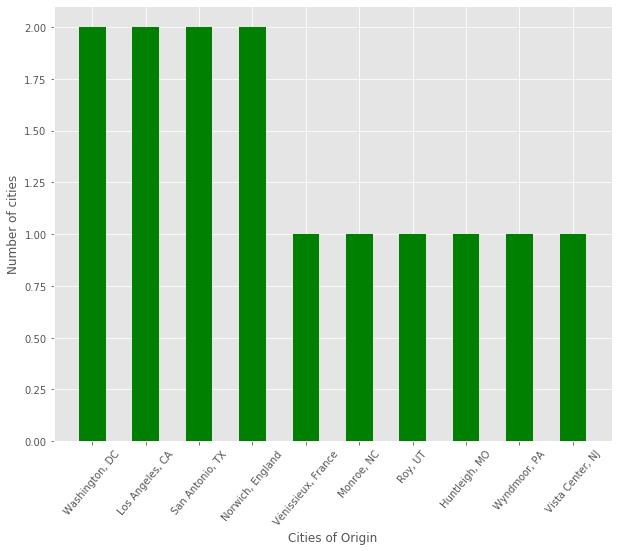

In [193]:
plt.figure(figsize=(10,8))
plt.bar(*zip(*c.most_common(10)), width=.5, color='g')
plt.xticks(rotation=50)
plt.xlabel("Cities of Origin")
plt.ylabel("Number of cities")
plt.show()

In [194]:
# Get a count of tweets grouped by location
loc_grouped_df = df[['place name', 'id']].groupby('place name', sort=False).count().sort_values(['id'], ascending=False)
loc_grouped_df.columns=['count']
loc_grouped_df.reset_index(inplace=True)
loc_grouped_df.head(10)

place name  count
0  Norwich, England      2    
1  San Antonio, TX       2    
2  Los Angeles, CA       2    
3  Washington, DC        2    
4  Havana, IL            1    
5  Upper Darby, PA       1    
6  Halifax, Nova Scotia  1    
7  Shawnee, KS           1    
8  CDMX                  1    
9  Castle Shannon, PA    1

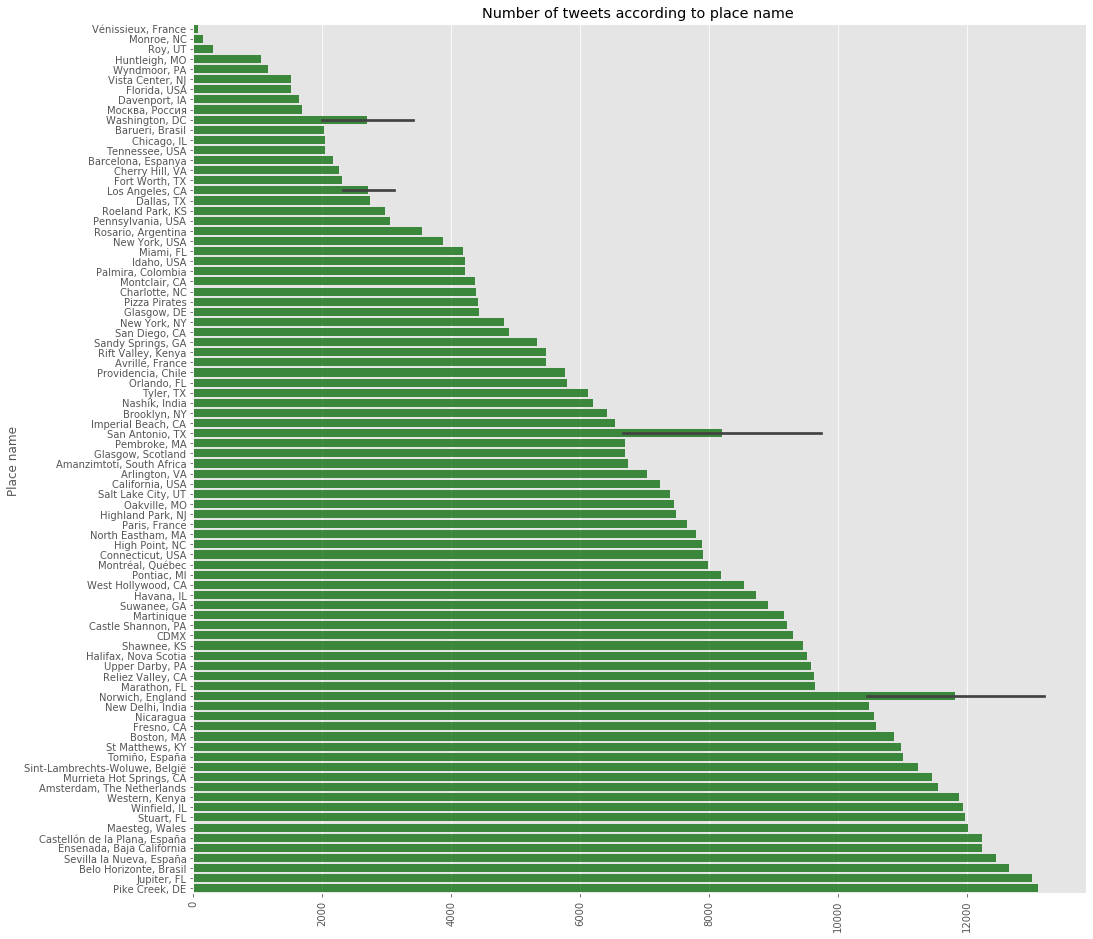

In [35]:
#lets explore created_at column
cnt_srs = df['place name']
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(16,16))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.ylabel('Place name ', fontsize=12)
plt.title("Number of tweets according to place name ")
plt.show()

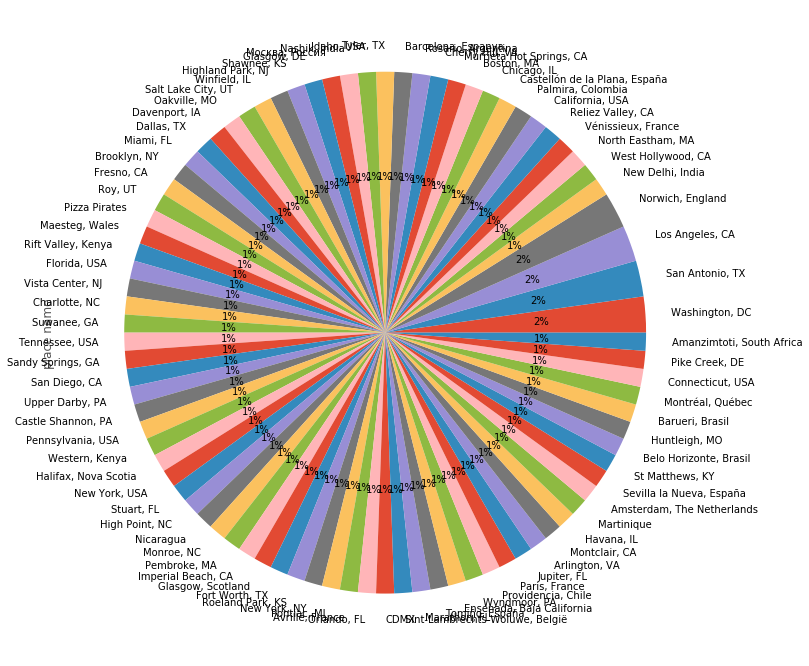

In [301]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 20
plot_size[1] = 12
plt.rcParams["figure.figsize"] = plot_size 
cnt_srs = df['place name'].value_counts().plot(kind='pie', autopct='%1.0f%%')

#### Tweet statistics

In [69]:
# how many tweets?
len(texts)

13492

#### Tweet: Hashtag

In [70]:
# how many tweets with hashtag?
# extract and display all hashtags from first 10 tweets
for tweet in texts[:10]:
    print(re.findall(r"(?<=#)\w+", tweet))

[]
['RiseUp']
[]
['China']
[]
['FakeNews']
[]
[]
['BlackLivesMatter', 'AbolishICE']
[]


In [71]:
#counthashtag
counthashtag = 0
for tweet in texts:
    if len(re.findall(r"(?<=#)\w+", tweet)) > 0:
        counthashtag += 1
        
print(counthashtag)

2066


In [72]:
# remove retweets so you can extract all original tweets and save them
originaltweets = []
for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

3528

In [73]:
# get retweets only
#remove original tweets
retweets_only = []
for tweet in texts:
    
        retweets_only.append(tweet)
        
len(retweets_only)

13492

In [111]:
# removing any error messages from Twitter API
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)  

13492

#### Most visible users

In [112]:
# display five screen names (twitter user names)
for i in tweets[:5]:
    print(i['user']['screen_name'])

germancuriel5
jokerrabit
MarleneEsteller
velayat_vaghih
DastardlyQ


In [113]:
# first extract all users from tweets
#let's use regular expression ...     
for tweet in texts[:5]:
    print(re.findall(r"(?<=@)\w+", tweet))

[]
['UrUnpaidPundit']
['ArianeWalter']
['eucopresident']
['ChanelRion', 'OANN', 'NeilWMcCabe2', 'rpollockDC', 'jennfranconews', 'RobHerring', 'CharlesPHerring']


In [114]:
# there could be multiple mentions in a single tweet
for tweet in texts[:5]:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        print('@'+i)

@UrUnpaidPundit
@ArianeWalter
@eucopresident
@ChanelRion
@OANN
@NeilWMcCabe2
@rpollockDC
@jennfranconews
@RobHerring
@CharlesPHerring


In [115]:
visible_users = []
for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i][0])

In [116]:
# 10 most visible users in this dataset
c = Counter(visible_users)
c.most_common(10)

[('@realDonaldTrump', 734),
 ('@JoeBiden', 327),
 ('@ewarren', 159),
 ('@DineshDSouza', 140),
 ('@joelockhart', 101),
 ('@jsolomonReports', 101),
 ('@catturd2', 83),
 ('@DonaldJTrumpJr', 79),
 ('@SenSchumer', 75),
 ('@joncoopertweets', 73)]

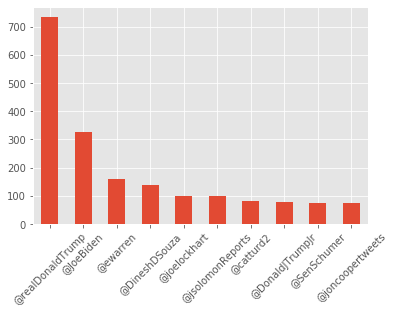

In [117]:
# visualize 10 most visible users
visible_df = pd.DataFrame(c.most_common(10))
ax = visible_df.plot(kind='bar', legend = False)
ax.set_xticklabels(visible_df[0], rotation=45);

# Content analytics

### Sentiment Analysis

In this section, I will break tweets into positive, negative, and neutral based on sentiment analysis. I will use the TextBlob sentiment analyzer to do so

#####  I will break tweets into positive, negative, and neutral based on sentiment analysis.

In [265]:
# Let’s check the polarity of tweets. Polarity ranges from 2 (most negative) to 1 (most positive)
from textblob import TextBlob
df['sentiment'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [246]:
#load df
df[['text','sentiment']].head()

text  \
0  cuantas veces cree le hacen prueba del amlo al día                                                                            
1  urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup httpstcomkd4cwyk                       
2  arianewalter marseille suit le préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille   
3  eucopresident eu pademic show little dignity confrontation china doin httpstcoeqad4xueu6                                      
4  chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1   

   sentiment  
0  0.0000     
1  0.7000     
2  0.0000     
3 -0.1875     
4  0.0000

In [ ]:
cut = pd.cut(
    df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df['polarity'] = cut.values
df[['polarity','sentiment']][:20]

First several rows look good, polarity and sentiment are in line with each other, meaning the higher the sentiment, the higher the polarity, as it should be.

In [247]:
# five random tweets with highest positive sentiment polarity
print("5 random tweets with highest positive sentiment polarity: \n")
cL = df.loc[df.sentiment==1, ['text']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest positive sentiment polarity: 

upyourjunker1 uk backed trump call investigation china role outbreak best hope uk

jewelzjonez here example patriot using 80 acre tractor show support greatest potus ever p

excellent votersunite please melissaamour72 rodball22 joanna_resists regan0002112 l2obel2t httpstco0d2luzsklz

petmom7 awesome maga qanon

rey_atl obama spied fbi lied msm let slide side dems best cover hide



In [248]:
#five random tweets with highest nagative sentiment polarity
print("5 random tweets with highest nagative sentiment polarity: \n")
cL = df.loc[df.sentiment==-1, ['text']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest nagative sentiment polarity: 

deanna4congress one governor worst

pic wuhan scientist handling bat shocking lack safety precaution deleted institute website httpstcoujhwdm44ae

thehill u endures worst oneday death toll pandemic yet state begin reopen httpstcoz5e7mxsq

nytimes antivaccination activist increasingly involved protest stayathome order presence terrifying

fairyq15 information leaking covid virus time shocking pic wuhan scientist handling bat sample deleted f



In [249]:
# five random tweets with neutral sentiment polarity
print("5 random tweets with neutral sentiment polarity: \n")
cL = df.loc[df.sentiment==0, ['text']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with neutral sentiment polarity: 

jerometaylor hong kong democracy protester planning hold multiple flashmob rally later friday defying restriction gathe

vaticannews popefrancis recall vocation sunday reiterates closeness suffering covid19 http

joelockhart breaking news lara endorses call potus release tax return well would think bei

brazil challenge accepted httpstcogc2brrjpds

abc7ny abc news obtained u intelligence report suggests china hid extent epidemic rest



Let's first see the number of positive , negative and neutral tweets  I will plot a pie chart and bar chart for that

In [251]:
# count total of polarity
df['polarity'].value_counts()

neutral     7526
positive    3466
negative    2500
Name: polarity, dtype: int64

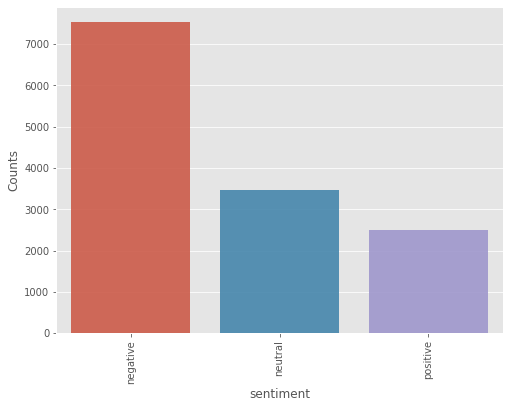

In [289]:
# Plot count polarity
import seaborn as sns
label_counts = df['polarity'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(labels, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('sentiment', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

From the output, you can see that the confidence level for negative tweets is higher compared to neutral and positive tweets.

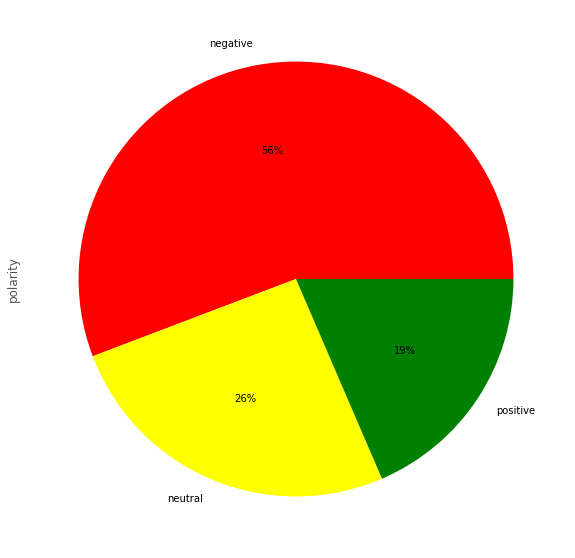

In [313]:
label_counts = df['polarity'].value_counts().plot(kind='pie', autopct='%1.0f%%',fig = plt.figure(figsize=(14,10)),
labels=['negative', 'neutral', 'positive'] ,colors=["red", "yellow", "green"])

From the output, you can see that the majority of the tweets are negative (59%), followed by neutral tweets (26%), and then the positive tweets (19%).

#### WordCloud sentiment analysis

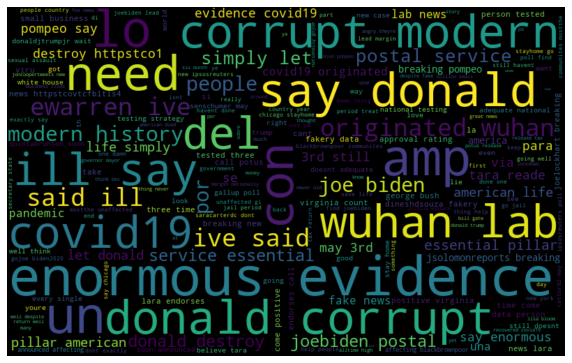

In [253]:
all_words = ' '.join([text for text in df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

You can see that the wordcloud for all my tweets wuhan , dolnald are the most mentioned

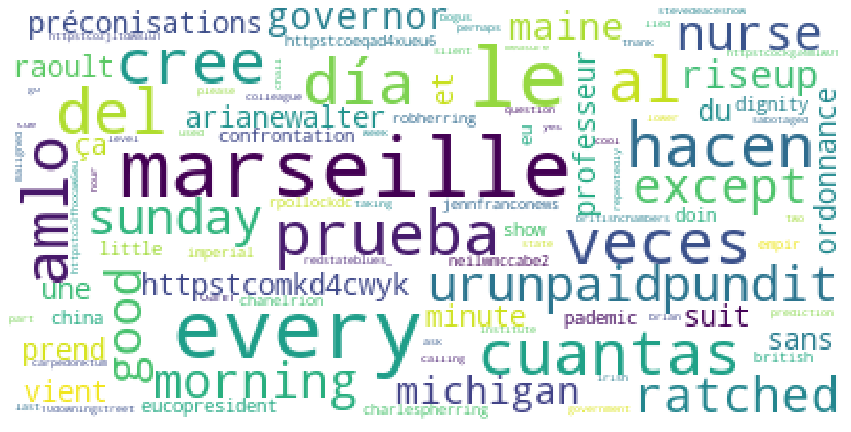

In [255]:
#wordcloud

wordcloud__ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=100,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

In [256]:
# Mapping Sentiments
df['polarity'] = df['polarity'].map({'neutral': 0, 'positive': 1,"negative":2})
df[['text','polarity']].head()

text  \
0  cuantas veces cree le hacen prueba del amlo al día                                                                            
1  urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup httpstcomkd4cwyk                       
2  arianewalter marseille suit le préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille   
3  eucopresident eu pademic show little dignity confrontation china doin httpstcoeqad4xueu6                                      
4  chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1   

  polarity  
0  0        
1  1        
2  0        
3  2        
4  0

In [257]:
#check for NAN
df[['text','polarity']][df[['text','polarity']].isnull().any(axis=1)]

Empty DataFrame
Columns: [text, polarity]
Index: []

In [258]:
# load df
df[['text','polarity']]

text  \
0      cuantas veces cree le hacen prueba del amlo al día                                                                            
1      urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup httpstcomkd4cwyk                       
2      arianewalter marseille suit le préconisations du professeur raoult vient sans ordonnance et ça prend une minute à marseille   
3      eucopresident eu pademic show little dignity confrontation china doin httpstcoeqad4xueu6                                      
4      chanelrion oann neilwmccabe2 rpollockdc jennfranconews robherring charlespherring british imperial empir httpstcozjltdw8lu1   
...                                                                                                                            ...   
13487  cool please thank                                                                                                             
13488  redstateblues_ silent repeatedly used bogus lower prediction last two week chall                                              
13489  stevedeaceshow yes measure state level part question ask go httpstcockg34mlw01                                                
13490  perhaps taking cue irish government britishchambers calling 10downingstreet institute httpstco3fhxxaw6eu                      
13491  carpedonktum brian colleague lied sabotaged maligned every hour every day th                                                  

      polarity  
0      0        
1      1        
2      0        
3      2        
4      0        
...   ..        
13487  1        
13488  0        
13489  0        
13490  0        
13491  0        

[13492 rows x 2 columns]

#### Words with neutral tweets

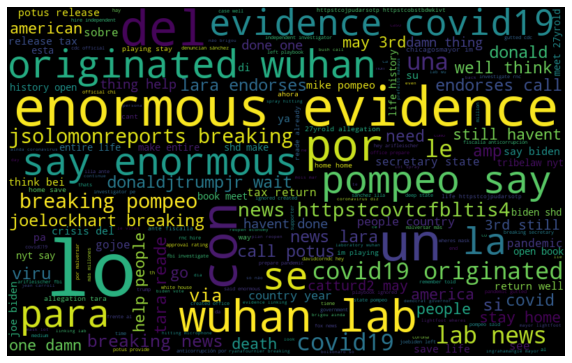

In [260]:

neutral_words =' '.join([text for text in df['text'][df['polarity'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Words with positive Tweets

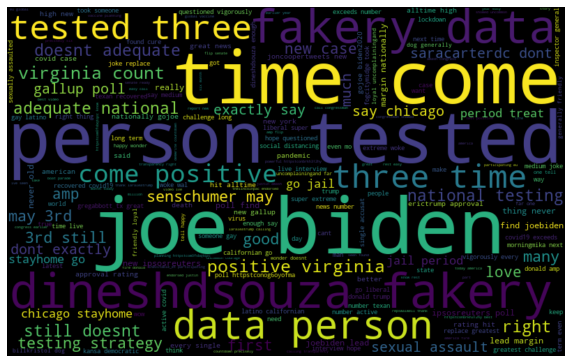

In [262]:
positive_words = ' '.join([text for text in df['text'][df['polarity'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

 it seems like person tested and joe biden are the most mentioned characteristics.

#### Tweets with negative words

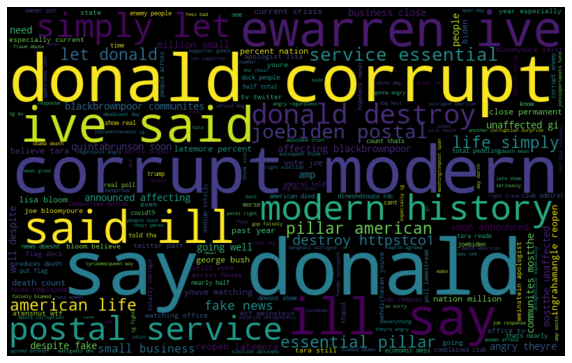

In [263]:
negative_words = ' '.join([text for text in df['text'][df['polarity'] == 2]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

corrupt modern is the most popular of them all

# Machine Learning

#### Divide the data into features and training set

In [80]:
X = df["text"]
y = df["polarity"]

In [81]:
# Dividing Data into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

which means that my data set will be split into two sets of 80% and 20% data. We will use the 80% dataset for training and 20% dataset for testing.

In [82]:
X_train.shape , y_train.shape

((10793,), (10793,))

In [83]:
test_df.shape , y_test.shape

((2699,), (2699,))

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit_transform(X_train)

<10793x26368 sparse matrix of type '<class 'numpy.int64'>'
	with 116977 stored elements in Compressed Sparse Row format>

In [85]:
# using the vectorizer above to encode a document
simple_train_dtm = vect.transform(X_train)
# examine the vocabulary and document-term matrix together
X_train = pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())
X_train.head()


000  0000  007  007alisohrab  02  03  0305  03052020  03may  03時05分28秒  \
0  0    0     0    0             0   0   0     0         0      0           
1  0    0     0    0             0   0   0     0         0      0           
2  0    0     0    0             0   0   0     0         0      0           
3  0    0     0    0             0   0   0     0         0      0           
4  0    0     0    0             0   0   0     0         0      0           

   ...  記事  请大家帮助  辞めたがらない安倍が贈ったのは2枚のマスク  都庁の建物の近くでコロナウィルスホームレスが増加  \
0  ...  0   0      0                      0                          
1  ...  0   0      0                      0                          
2  ...  0   0      0                      0                          
3  ...  0   0      0                      0                          
4  ...  0   0      0                      0                          

   難民と呼ぶなはもしかして自己責任論を内面化して  재민버블  𝑭𝑨𝑲𝑬  𝑭𝑹𝑨𝑼𝑫  𝑹𝑰𝑵𝑶  𝗢𝗣𝗘𝗡  
0  0                        0     0     0      0     0     
1  0                        0     0     0      0     0     
2  0                        0     0     0      0     0     
3  0                        0     0     0      0     0     
4  0                        0     0     0      0     0     

[5 rows x 26368 columns]

In [86]:
X_train.shape

(10793, 26368)

In [87]:
## using the vectorizer above to encode a document
test = vect.transform(test_df)
X_test = pd.DataFrame(test.toarray(), columns=vect.get_feature_names())
X_test.head()

000  0000  007  007alisohrab  02  03  0305  03052020  03may  03時05分28秒  \
0  0    0     0    0             0   0   0     0         0      0           
1  0    0     0    0             0   0   0     0         0      0           
2  0    0     0    0             0   0   0     0         0      0           
3  0    0     0    0             0   0   0     0         0      0           
4  0    0     0    0             0   0   0     0         0      0           

   ...  記事  请大家帮助  辞めたがらない安倍が贈ったのは2枚のマスク  都庁の建物の近くでコロナウィルスホームレスが増加  \
0  ...  0   0      0                      0                          
1  ...  0   0      0                      0                          
2  ...  0   0      0                      0                          
3  ...  0   0      0                      0                          
4  ...  0   0      0                      0                          

   難民と呼ぶなはもしかして自己責任論を内面化して  재민버블  𝑭𝑨𝑲𝑬  𝑭𝑹𝑨𝑼𝑫  𝑹𝑰𝑵𝑶  𝗢𝗣𝗘𝗡  
0  0                        0     0     0      0     0     
1  0                        0     0     0      0     0     
2  0                        0     0     0      0     0     
3  0                        0     0     0      0     0     
4  0                        0     0     0      0     0     

[5 rows x 26368 columns]

In [88]:
X_test.shape

(2699, 26368)

#### Training the Model

Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. I will use the Random Forest algorithm, to its ability and non-normalized data

In [89]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500,oob_score=True,min_samples_split=5 )
%time model_rf.fit(X_train, y_train )

Wall time: 49min


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

#### Making Predictions and Evaluating the Model

In [90]:
y_pred = model_rf.predict(X_test)

##### Finally, to evaluate the performance of the machine learning models, i can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1495    9    2]
 [  60  623   10]
 [  56   22  422]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1506
           1       0.95      0.90      0.93       693
           2       0.97      0.84      0.90       500

    accuracy                           0.94      2699
   macro avg       0.95      0.91      0.93      2699
weighted avg       0.94      0.94      0.94      2699

0.9410892923304928


***From the output, you can see that my algorithm achieved an accuracy of 94.10***

# Topic modeling

In [92]:
vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = vectorizer_.fit_transform(df['text'])

#### Applying Latent Dirichlet Allocation models

In [95]:
lda_ = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online',verbose=True)
tweets_lda = lda_.fit_transform(tweets_vectorized)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


#### Printing keywords

In [96]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [97]:
# Display the 10 topics 
print("Tweets LDA Model:")
selected_topics(lda_, vectorizer_)

Tweets LDA Model:
Topic 0:
[('say', 406.6585330368061), ('covid', 355.78071238405374), ('donald', 319.2153495184814), ('said', 228.6068082883749), ('ive', 191.1224683940063), ('history', 186.7747174260553), ('corrupt', 181.3524324715438), ('democrat', 179.62866743869813), ('world', 177.81235593008228), ('government', 166.27463587807472)]
Topic 1:
[('httpstco', 380.95617576318614), ('crisis', 172.51858642292268), ('told', 123.17743004211505), ('business', 121.40765695585618), ('house', 119.52887010588502), ('say', 114.91385405731826), ('million', 113.74339277480807), ('man', 112.89786628807718), ('white', 109.2502253408757), ('open', 105.52982269928835)]
Topic 2:
[('american', 246.4197529984412), ('let', 239.11297751242137), ('life', 233.26430158881178), ('httpstco', 199.43102796441096), ('joebiden', 183.02151771990725), ('come', 160.69652564558442), ('home', 159.84650649725046), ('positive', 147.4690978448564), ('thats', 141.36232565878979), ('service', 136.7492511360876)]
Topic 3:
[('

**The output shows that the frist topic might contain tweets about covid19 with ('covid', 355.78071238405374). 
Sounds like a topic 0 related to Coronavirus.
The output shows that the second topic might contain tweets about crisis with ('crisis', 172.51858642292268)
Sounds like a topic 2 related to crisis.
Topic 6 related to crisis.('trump', 382.8578509136989)
Topic 9 related to crisis('people', 332.7344869661617)**

#### Visualizing LDA results of tweets with pyLDAvis

In [100]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_, tweets_vectorized, vectorizer_, mds='tsne')
dash

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952  8.115230   1       1        12.175944
6      0.648955   71.707100  2       1        10.968191
3      71.019684  9.971006   3       1        10.753706
9      3.785981   33.185135  4       1        9.924159 
8     -42.666500 -9.222070   5       1        9.913002 
2     -3.621689  -43.526516  6       1        9.472252 
1     -3.632402  -4.171708   7       1        9.445381 
4     -36.584400  35.804413  8       1        9.324524 
0      44.391380  50.615383  9       1        9.188550 
7      40.235809 -31.591665  10      1        8.834292 , topic_info=     Category        Freq      Term       Total  loglift  logprob
2710  Default  415.000000  new       415.000000  30.0000  30.0000
1867  Default  849.000000  httpstco  849.000000  29.0000  29.0000
159   Default  386.000000  amp       386.000000  28.0000  28.0000
3567  Default  723.000000  say       723.000000  27.0000  27.0000
874   Default  902.000000  covid     902.000000  26.0000  26.0000
...       ...         ...    ...            ...      ...      ...
1867  Topic10  110.326184  httpstco  849.430597  0.3854  -4.3599 
483   Topic10  70.705997   breaking  229.194848  1.2505  -4.8048 
644   Topic10  68.299026   china     309.365079  0.9159  -4.8394 
574   Topic10  66.702370   case      377.793003  0.6924  -4.8631 
874   Topic10  60.104495   covid     902.720933 -0.2828  -4.9672 

[442 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
4     4      0.992438  abc           
41    2      0.984372  active        
56    5      0.989761  adequate      
60    9      0.993385  administration
74    1      0.980232  affecting     
...  ..           ...             ...
4422  5      0.147340  year          
4422  6      0.203676  year          
4425  4      0.979593  yes           
4431  3      0.980805  york          
4438  8      0.976648  youve         

[489 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 4, 10, 9, 3, 2, 5, 1, 8])

**Above is a display of the topics for tweets.
Note that the top 5 words in topic number 2 were covid , donald, biden, news, and case.**

# Network Analytics

#### Prepare network data by using positive words

Prepare the dataset and create dataframe

In [174]:
positive_words = ' '.join([text for text in df['text'][df['polarity'] == 1]])

In [177]:
df = pd.DataFrame(df['text'][df['polarity'] == 1])

In [180]:
df.to_csv('../final_project/ra.csv')

In [181]:
#load
data = []
r = csv.reader(open('../final_project/ra.csv',errors='ignore'))
#r = csv.reader(open('data/politics2015_gop.csv', 'r', encoding = "ISO-8859-1"))
for i in r:
    data.append(i)  
len(data)

3942

Clean positive words

In [186]:
# text cleaning using function

def text_pro(texts):
    # Remove useless numbers and alphanumerical words
    documents = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in data]

    # tokenize
    texts = [[word for word in text.lower().split() ] for text in documents]

    # stemming words: having --> have; friends --> friend
    lmtzr = WordNetLemmatizer()
    texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]

    #porter_stemmer = PorterStemmer()
    #texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

    # remove common words 
    stoplist = stopwords.words('english')
    texts = [[word for word in text if word not in stoplist] for text in texts]

    #remove short words
    texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]    
    return texts

In [187]:
# call the function
texts =text_pro(data)

In [188]:
# A list of extra stopwords specific to the debates transcripts (if you want to remove more stopwords)
extra_stopwords = ['will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','RT','tell','amp','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look','see','https']

# remove extra stopwords
extra_stopwords = stopwords.words('english')
texts = [[word for word in text if word not in extra_stopwords] for text in texts]

In [189]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_above=5, no_below=0.5)                           #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

8880

In [191]:
corpus = [dictionary.doc2bow(text) for text in texts]
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 8880
Number of documents: 3942


In [217]:
# save some tweets for network analysis purpose
df = pd.read_csv("../final_project/ra.csv",index_col=[0])
df.head()

text
1   RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK… 
5   RT @rexxurection: And what a coincidence that on the same day, 2 familiar names from #FakeNews drop this article:\n\nhttps://t.co/MUVgNHvx0m…
9   RT @BrendaLArvizu: My brilliant spouse recommends we shred then send back to Trump* the letters that accompany the stimulus checks, therefo… 
17  RT @KurtNiceHHL: @SashaPezenik The only thing this smear accomplished was putting the media’s failures and Trump’s credible rape allegation… 
22  RT @glennkirschner2: Many people key in on the term “involuntary.” But in the homicide context, “voluntary” manslaughter is a “heat of pass…

In [218]:
# Rename columns 
df.columns = ['cleaning']
df.head()

cleaning
1   RT @UrUnpaidPundit: ☕🌞 Good Sunday morning to all except the "Nurse Ratched" governors of Michigan and Maine. #RiseUp https://t.co/MkD4cwyK… 
5   RT @rexxurection: And what a coincidence that on the same day, 2 familiar names from #FakeNews drop this article:\n\nhttps://t.co/MUVgNHvx0m…
9   RT @BrendaLArvizu: My brilliant spouse recommends we shred then send back to Trump* the letters that accompany the stimulus checks, therefo… 
17  RT @KurtNiceHHL: @SashaPezenik The only thing this smear accomplished was putting the media’s failures and Trump’s credible rape allegation… 
22  RT @glennkirschner2: Many people key in on the term “involuntary.” But in the homicide context, “voluntary” manslaughter is a “heat of pass…

In [224]:
#Remove numbers,urls,Remove non-alphabetic words & characters,Remove short words (< 3),Remove stopwords
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# adding movie script specific stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["babygotmackk", "need", "thought"])
df['cleaning'] = df.cleaning.str.lower()
df['cleaning'] = df.cleaning.str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')   # remove http # \S Matches any character that is not a whitespace character (spaces, tabs, line breaks).
df['cleaning'] = df.cleaning.str.replace("[^a-zA-Z]", " ")   # # remove numbers and other non-English words
df['cleaning'] = df.cleaning.str.findall('\w{3,}').str.join(' ')   # remove short words
df['cleaning'] = df.cleaning.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))   # remove stopwords
df['cleaning'] = df['cleaning'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))
df['cleaning']

1        urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup                 
5        rexxurection coincidence day familiar name fakenews drop article                                       
9        brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo
17       kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation
22       glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pas       
                                                       ...                                                      
13474    bfmtv direct confinement gers loire atlantique mayenne passent vert                                    
13484    amydentata trump made think bush okay right winger come trump will make think trump                    
13485    brucebartlett good piece new yorker explaining ultra right took control republican part

In [225]:
df['cleaning'] = df['cleaning'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

cleaning
1   urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup                 
5   rexxurection coincidence day familiar name fakenews drop article                                       
9   brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo
17  kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation
22  glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pa

In [226]:
# let's process the data in list (better for text processing)
tweets = df.values
len(tweets)

3941

In [227]:
for tweet in tweets[:2]:
    print(tweet)

['urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup']
['rexxurection coincidence day familiar name fakenews drop article']


In [228]:
mention = []

for tweet in tweets:
    mention.append(tweet)
    
mention[:5]

[array(['urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup'],
       dtype=object),
 array(['rexxurection coincidence day familiar name fakenews drop article'],
       dtype=object),
 array(['brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo'],
       dtype=object),
 array(['kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation'],
       dtype=object),
 array(['glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pa'],
       dtype=object)]

In [229]:
for tweet in mention[:5]:
    print(tweet, re.findall(r"(?<=@)\w+", tweet[0]))

['urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup'] []
['rexxurection coincidence day familiar name fakenews drop article'] []
['brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo'] []
['kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation'] []
['glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pa'] []


In [241]:
for tweet in mention[:10]:
    a = re.findall(r"(?<=@)\w+", tweet[0])
    for i in a:
        print(tweet, i)
    

array(['amitshah vulture alive though died painfull death coronavirus keep practicing bow will future lot'],
      dtype=object)

In [249]:
#remove extra brackets
tweet = [x for y in mention for x in y]
tweet[:5]

['urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup',
 'rexxurection coincidence day familiar name fakenews drop article',
 'brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo',
 'kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation',
 'glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pa']

In [279]:
df = pd.read_csv('../final_project/moi.csv',index_col = 0)
df.head()

cleaning
1   urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup                 
5   rexxurection coincidence day familiar name fakenews drop article                                       
9   brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo
17  kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation
22  glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pa

In [280]:
# drop Unnamed
data = df.loc[:, ~df.columns.str.match('Unnamed')]
data

cleaning
1      urunpaidpundit good sunday morning except nurse ratched governor michigan maine riseup                 
5      rexxurection coincidence day familiar name fakenews drop article                                       
9      brendalarvizu brilliant spouse recommends shred send back trump letter accompany stimulus check therefo
17     kurtnicehhl sashapezenik thing smear accomplished putting medium failure trump credible rape allegation
22     glennkirschner many people key term involuntary homicide context voluntary manslaughter heat pa        
...                                                                                                ...        
13474  bfmtv direct confinement gers loire atlantique mayenne passent vert                                    
13484  amydentata trump made think bush okay right winger come trump will make think trump                    
13485  brucebartlett good piece new yorker explaining ultra right took control republican party               
13487  realdonaldtrump cool please thank                                                                      
13489  stevedeaceshow yes measure state level part question ask                                               

[3941 rows x 1 columns]

In [282]:
# Export Pandas DataFrame to a CSV File
data.to_csv('../final_project/toi.csv',index=False)

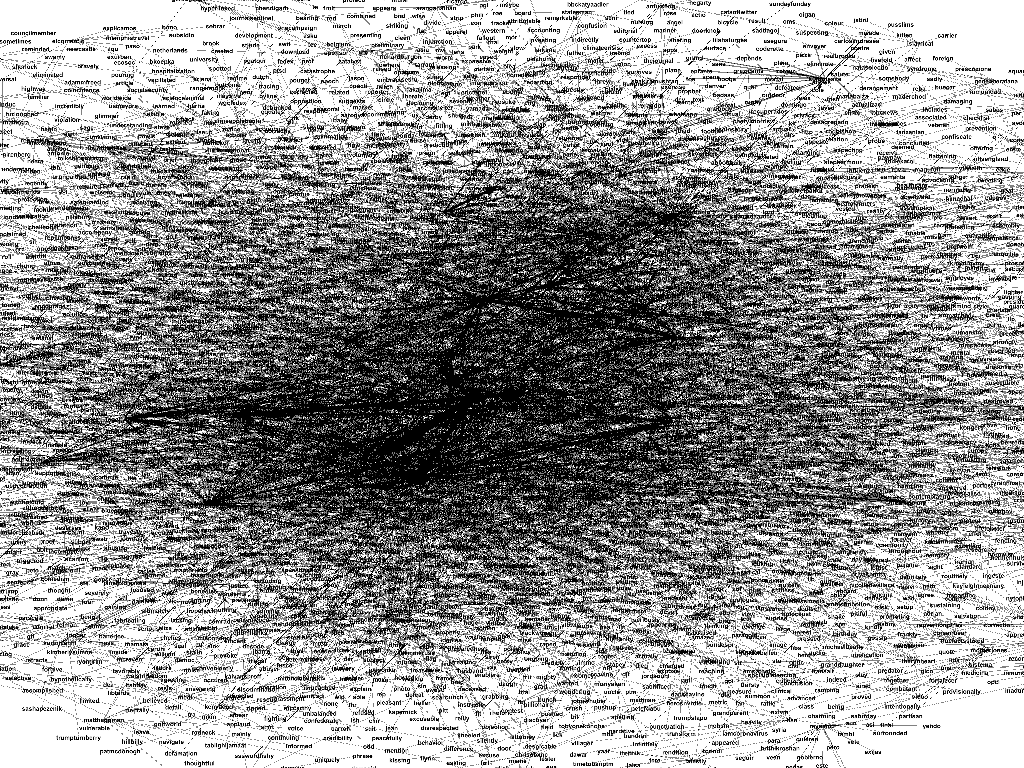

In [308]:
from IPython.display import Image
Image("../final_project/screenshot.png")

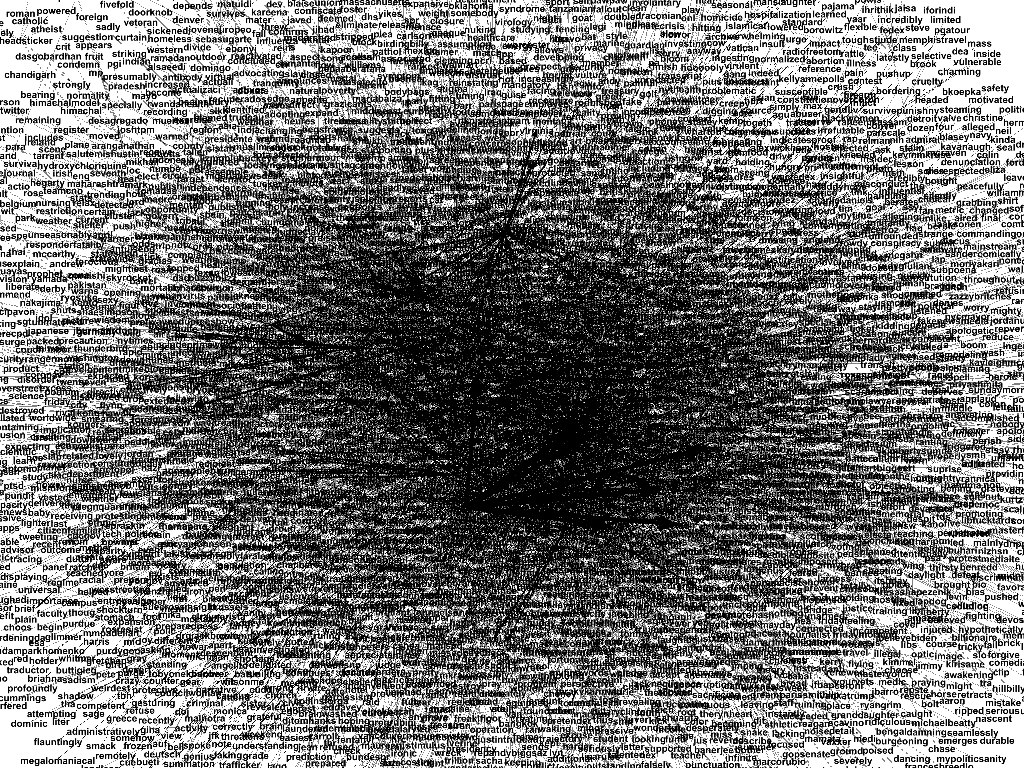

In [310]:
from IPython.display import Image
Image("../final_project/screen.png")

#### Statistical analyses (e.g., centrality, degree) and modularity analysis using Gephi

**It was interesting to see the entire network and how the characters had been organized and grouped together into modular communities. 
In addition the node size, which was determined according to the node betweenness centrality, allowed for the characters that have the most connectivity to be easily identifiable in comparison to lesser-connected ones. As seen above, it is clear that Trump Coronavirus and News have more connections.
It is interesting that Trump Coronavirus and realdolnaltrump have the high Degree,while these two character pairings appear most frequently together.
catastrophe ,restriction and family have high modularity than policitian ,campus Michagan.**

# Final analysis & storytelling

The objective of this task to understand what people are talking about coronavirus on twitter.Build a predictive model to detect, sort it into sentiments positive, negative or neutral.
The above analysis shows among 13,492 tweets 3528 are original tweets and 2066 are retweets We can see hashtags like RiseUp ,China, FakeNews
and most visible users are '@realDonaldTrump','@JoeBiden'and '@ewarren', 159.
Sentiment analysis helps me understand people’s attitudes and feelings towards a particular topic.From the output of Wordcloud analysis, clearly, the COVID-19 is related to Wuhan.
Let's now see the distribution of sentiments across all the tweets The From the output, you can see that the majority of the tweets are negative (56%), followed by neutral tweets (26%), and then the positive tweets (19%).The top 3 most mentioned words in the negative tweets category were "corrupt", "modern", "dolnald".

As i analyze the topics discovered by LDA model, i see that these topics are basically probabilistic word distribution which can very well describe a particular theme or content. After experimenting number of times with tweets news, I came to a conclusion that words in the modeled topics may not be perfectly similar but are definitely associated. A very few topics generated from unsupervised training are content neutral. For example: Topic 3:('new', 438.9381623206359), ('los', 394.01618367827916), ('death', 335.4258056005898), ('case', 232.45169358359271), ('day', 230.76529872875793), ('time', 216.00913185923943), ('poll', 174.70213964479333), ('american', 130.84826929355722), ('gop', 128.73279126980566), ('gojoe', 123.04543791108229) and Topic 4:('want', 235.99921846789476), ('joe', 229.01690270017778), ('virus', 175.10652692860458), ('biden', 172.26956453506324), ('lockdown', 167.5561718467043), ('care', 137.97768162573806), ('vote', 135.04069031851466), ('pour', 134.53969133900566), ('party', 117.84026567775561), ('une', 95.85229193012293).
Also the output of topic modeling with Gensim show hidden topics in the data. like dog, video.

The 2699 sample tweets or (20%) were randomly picked. To determine the numerical findings of the result per metric.
2 positive tweets correctly predicted as positive & 9 false positive ==> This indicates that you would expect some neutral 1495 in the tweet.10 negative tweets correctly as positive &  623 false negative ==> This indicates that you would expect some neutral in the review.
overall accuracy: 0.94.10
